In [64]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os   

In [65]:
pwd = os.getcwd()

In [66]:
#Get the dataset

df = pd.read_excel (pwd + '\Bike Sales Dashboard.xlsx')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Bracket,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [67]:
#Data types

df.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Age Bracket         object
Purchased Bike      object
dtype: object

In [68]:
#Copy the data to use

df_use = df.copy()

In [69]:
#Checking the missing data

for col in df_use.columns:
    a = np.mean(df_use[col].isnull())
    print('{} - {}%'.format(col, a*100))

ID - 0.0%
Marital Status - 0.0%
Gender - 0.0%
Income - 0.0%
Children - 0.0%
Education - 0.0%
Occupation - 0.0%
Home Owner - 0.0%
Cars - 0.0%
Commute Distance - 0.0%
Region - 0.0%
Age - 0.0%
Age Bracket - 0.0%
Purchased Bike - 0.0%


In [70]:
#Check duplicated data

df_use.duplicated(subset = ['ID']).sum()

0

In [71]:
#Rename the data named "Purchased Bike"

df_use.rename(columns= {'Purchased Bike' : 'Purchased_bike'}, inplace= True)
df_use.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Bracket,Purchased_bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [72]:
df_yes = df_use.query('Purchased_bike == "Yes"')
df_yes.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Bracket,Purchased_bike
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
6,27974,Single,Male,160000,2,High School,Management,Yes,4,0-1 Miles,Pacific,33,Middle Age,Yes
7,19364,Married,Male,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,43,Middle Age,Yes
9,19280,Married,Male,120000,2,Partial College,Manual,Yes,1,0-1 Miles,Europe,40,Middle Age,Yes


(array([0, 1, 2]),
 [Text(0, 0, 'North America'), Text(1, 0, 'Europe'), Text(2, 0, 'Pacific')])

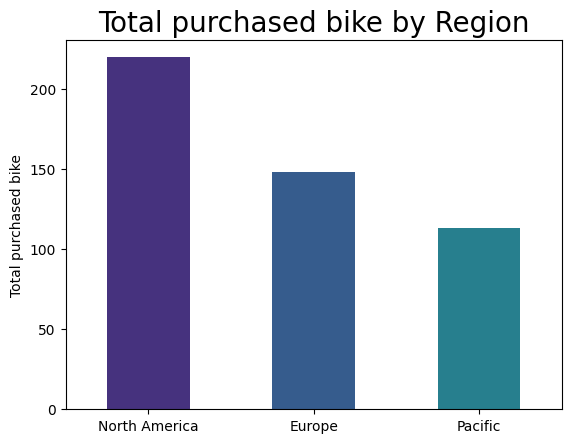

In [74]:
#Total purchased bike by Region (barchart)

df_yes['Region'].value_counts().plot(kind ='bar', ylabel= 'Total purchased bike', color = sns.color_palette('viridis'))
plt.title("Total purchased bike by Region", fontsize = 20)
plt.xticks(rotation = 0)

Text(0.5, 1.0, 'Total purchased bike by Age')

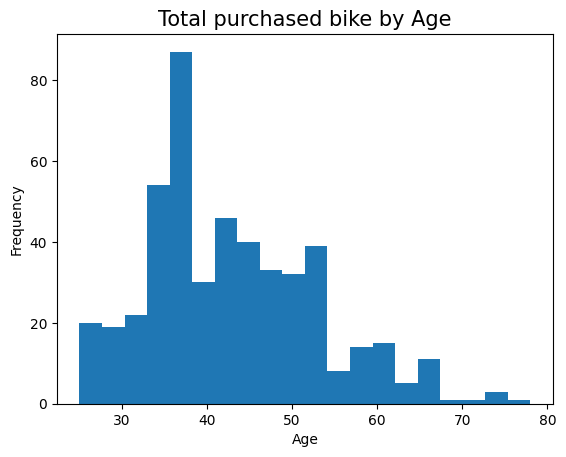

In [75]:
#Total purchased bike by Age (histogram chart)

df_yes['Age'].plot(kind = 'hist', bins =20)
plt.xlabel('Age', fontsize = 10)
plt.title("Total purchased bike by Age", fontsize = 15)

Text(0.5, 1.0, 'Total purchased bike by Age')

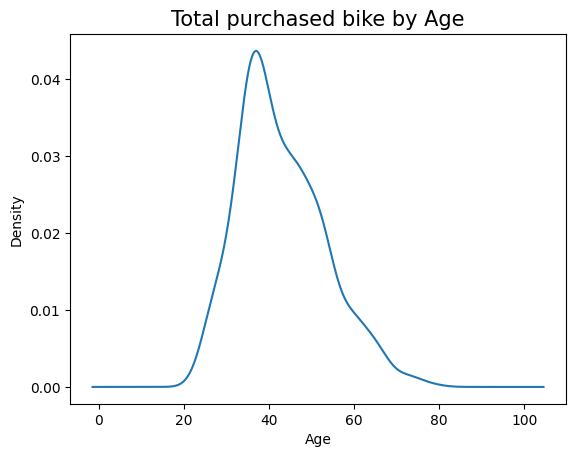

In [76]:

df_yes['Age'].plot(kind = 'kde')
plt.xlabel('Age', fontsize = 10)
plt.title("Total purchased bike by Age", fontsize = 15)

In [199]:
#Make a table between Income and Count purchased bike
df_corr1 = df_yes['Income'].value_counts().reset_index().rename(columns= {'index':'Income', 'Income':'yes_count'})
df_corr1.head()

,Income,yes_count
0,40000,90
1,60000,81
2,70000,66
3,30000,54
4,80000,35


Text(0.5, 1.0, 'Correlation between income and buying decision')

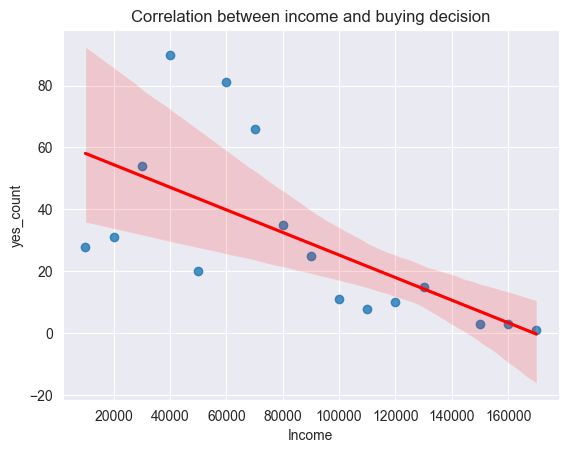

In [200]:
#Regression between Income and Decision (regression chart)

sns.regplot( data = df_corr1, x = 'Income', y = 'yes_count', line_kws = {'color':'red'})
plt.title('Correlation between income and buying decision')

In [201]:
#Make a table between Cars and Count purchased bike
df_corr2 = df_yes['Cars'].value_counts().reset_index().rename(columns= {'index':'Cars', 'Cars':'yes_count'})
df_corr2

,Cars,yes_count
0,1,152
1,0,151
2,2,124
3,3,33
4,4,21


Text(0.5, 1.0, 'Correlation between cars and buying decision')

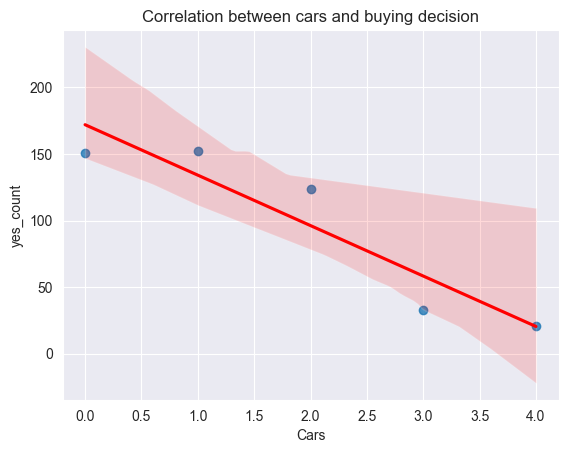

In [202]:
#Correlation between number of cars and Decision (regression chart)

sns.regplot( data = df_corr2, x = 'Cars', y = 'yes_count', line_kws = {'color':'red'})
plt.title('Correlation between cars and buying decision')

In [ ]:
# ---------- The conclusion: The more income and cars you have, the less bikes you buy 

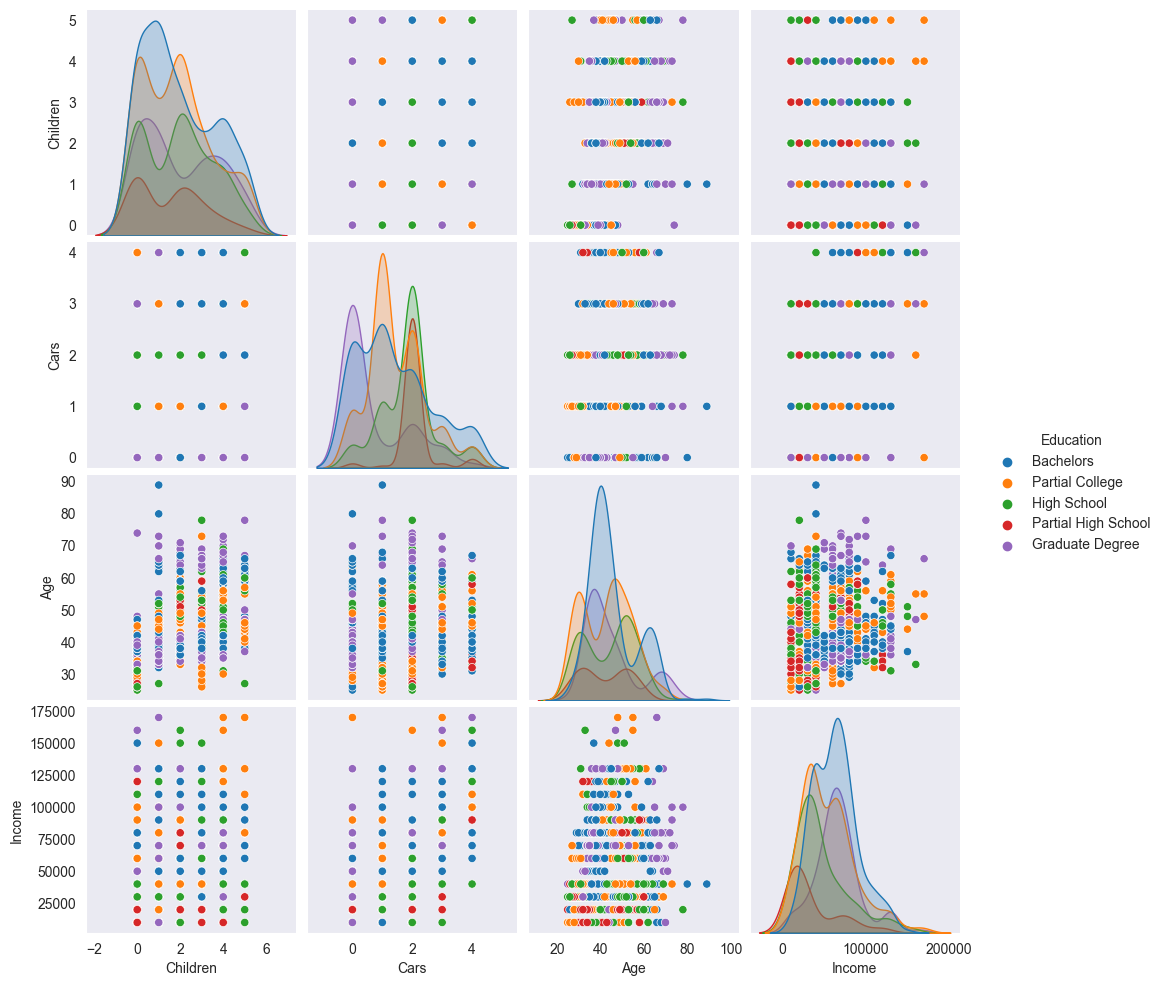

In [111]:
sns.pairplot(data =df_use, vars = ['Children', 'Cars', 'Age', 'Income'], hue = 'Education')
sns.set_style('darkgrid')

In [203]:
#Use this output for "Bought Bikes by Education" pie chart below

education = df_yes['Education'].value_counts().reset_index().rename(columns= {'index': "Education", 'Education': 'yes_count'})
education

,Education,yes_count
0,Bachelors,169
1,Partial College,119
2,Graduate Degree,94
3,High School,79
4,Partial High School,20


Text(0.5, 1.0, 'Bought Bikes by Education')

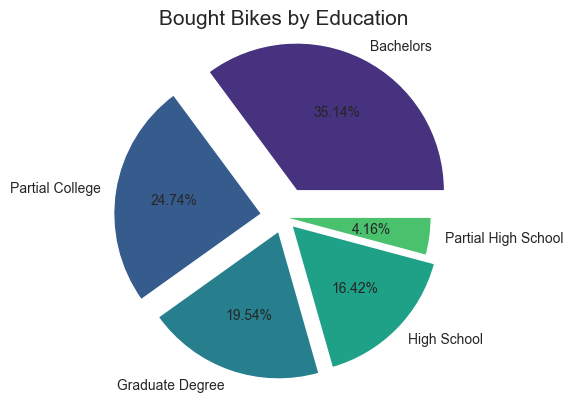

In [168]:
# "Bought Bikes by Education" pie chart

labels = ['Bachelors', 'Partial College', 'Graduate Degree', 'High School', 'Partial High School']
data = [169, 119, 94, 79, 20]
explode = (0.2, 0.15, 0.1, 0.08, 0)
plt.pie(data, labels = labels, explode = explode, colors = sns.color_palette('viridis'), autopct= '%.2f%%')
plt.title('Bought Bikes by Education', fontsize = 15)


In [204]:
#Use this output for "Bought Bikes by Occupation" donut chart below

occupation = df_yes['Occupation'].value_counts().reset_index().rename(columns= {'index': "Occupation", 'Occupation': 'yes_count'})
occupation

,Occupation,yes_count
0,Professional,150
1,Skilled Manual,115
2,Clerical,88
3,Management,73
4,Manual,55


<function matplotlib.pyplot.show(close=None, block=None)>

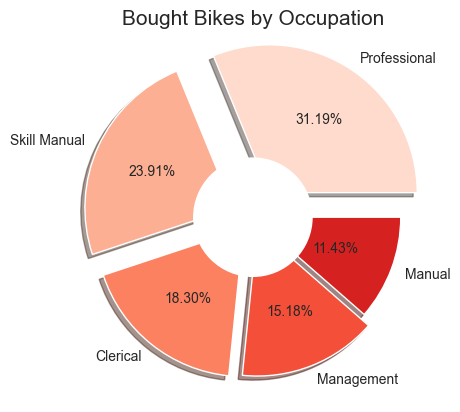

In [245]:
# "Bought Bikes by Occupation" donut chart 

labels = ['Professional', 'Skill Manual', 'Clerical', 'Management', 'Manual']
data = [150, 115, 88, 73, 55]
explode = (0.2, 0.15, 0.1, 0.08, 0)
plt.pie(data, labels = labels, explode = explode, colors = sns.color_palette('Reds'), autopct= '%.2f%%', shadow = True)
# plt.legend(loc = 'upper right')
plt.title('Bought Bikes by Occupation', fontsize = 15)

circle = plt.Circle(xy = (0,0), radius = 0.4, facecolor= 'white')
plt.gca().add_artist(circle)
plt.show

In [185]:
#Correlation table 

corr = df_yes[['Income', 'Children','Cars', 'Age']].corr(method='pearson')
corr

,Income,Children,Cars,Age
Income,1.000000,0.194962,0.452267,0.137220
Children,0.194962,1.000000,0.229376,0.526929
Cars,0.452267,0.229376,1.000000,0.263810
Age,0.137220,0.526929,0.263810,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

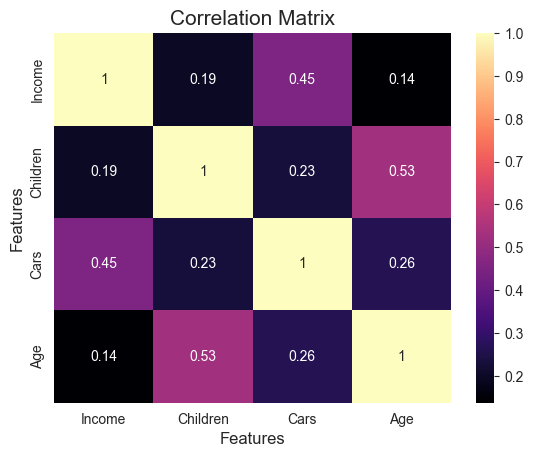

In [188]:
#Correlation Matrix by using heatmap

sns.heatmap(data = corr, cmap = 'magma', annot = True)
plt.xlabel("Features", fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.title('Correlation Matrix', fontsize = 15)

In [192]:
df_no = df_use.query('Purchased_bike == "No"')
df_no.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Bracket,Purchased_bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
5,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,Middle Age,No
8,22155,Married,Male,20000,2,Partial High School,Clerical,Yes,2,5-10 Miles,Pacific,58,Old,No


In [205]:
education_no = df_no['Education'].value_counts().reset_index().rename(columns = {'index' : 'Education', 'Education': 'no_count'})
education_no

,Education,no_count
0,Partial College,146
1,Bachelors,137
2,High School,100
3,Graduate Degree,80
4,Partial High School,56


In [209]:
merged_education = pd.merge(right = education_no, left = education, how = 'inner', left_on= 'Education', right_on = 'Education')
merged_education

,Education,yes_count,no_count
0,Bachelors,169,137
1,Partial College,119,146
2,Graduate Degree,94,80
3,High School,79,100
4,Partial High School,20,56


In [210]:
occupation_no = df_no['Occupation'].value_counts().reset_index().rename(columns = {'index' : 'Occupation', 'Occupation': 'no_count'})
occupation_no

,Occupation,no_count
0,Skilled Manual,140
1,Professional,126
2,Management,100
3,Clerical,89
4,Manual,64


In [212]:
merged_occupation = pd.merge(right = occupation_no, left = occupation, how = 'inner', left_on= 'Occupation', right_on = 'Occupation')
merged_occupation

,Occupation,yes_count,no_count
0,Professional,150,126
1,Skilled Manual,115,140
2,Clerical,88,89
3,Management,73,100
4,Manual,55,64


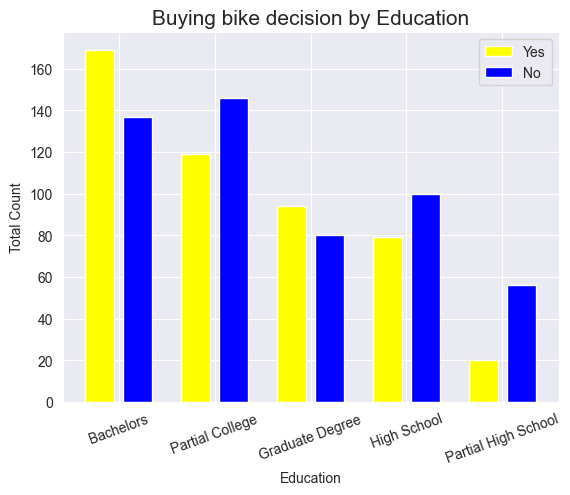

In [283]:
#Buying bike decision by Education barchart

labels = ['Bachelors', 'Partial College', 'Graduate Degree', 'High School', 'Partial High School']
yes = [169, 119, 94, 79, 20]
no = [137, 146, 80, 100, 56]

labels_axis = np.arange(len(labels))

plt.bar(labels_axis -0.2, yes, 0.3, label = 'Yes', color = 'yellow')
plt.bar(labels_axis +0.2, no, 0.3, label = 'No', color = 'blue')

plt.xticks(labels_axis, labels, rotation = 20)
plt.xlabel("Education")
plt.ylabel('Total Count')
plt.title('Buying bike decision by Education', fontsize = 15)
plt.legend()

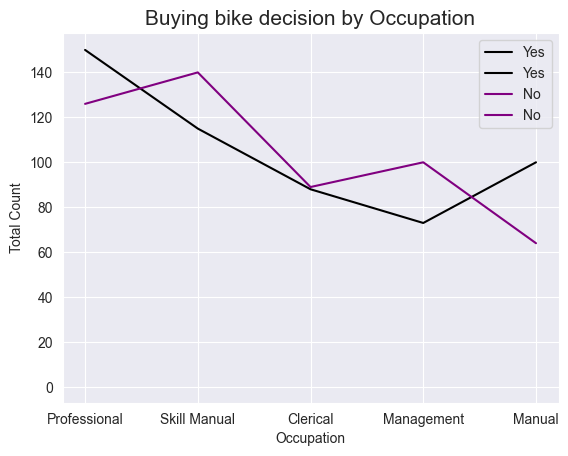

In [303]:

#Buying bike decision by Occupation barchart

labels = ['Professional', 'Skill Manual', 'Clerical', 'Management', 'Manual']
yes = [150, 115, 88, 73, 100]
no = [126, 140, 89, 100, 64]

labels_axis = np.arange(len(labels))

plt.plot(labels_axis , yes, 0.5, label = 'Yes', color = 'black')
plt.plot(labels_axis , no, 0.5, label = 'No', color = 'purple')

plt.xticks(labels_axis, labels)
plt.xlabel("Occupation")
plt.ylabel('Total Count')
plt.title('Buying bike decision by Occupation', fontsize = 15)
plt.legend()

In [ ]:
# ------------ The conclusion: Professional and Manual people are the ones who bought more bikes than others